### Concrete Strength Prediction - Regression Problem

In [1]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Bharathy_Nat/aiml_repo/Concrete-Strength-Prediction/concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.nunique()
# Though 'Age' column is a numerical, it has few distinct values, 
#and hence can be treated as categorical, and then labelEncoded to get ordinal numerical values



cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [8]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [9]:
## remove Duplicate Rows 
df.drop_duplicates(inplace=True)
df.shape


(1005, 9)

Univariate Analysis

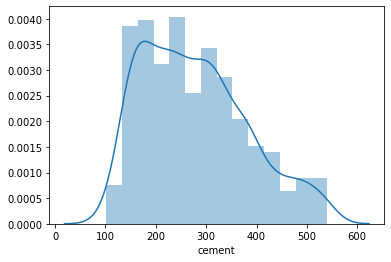

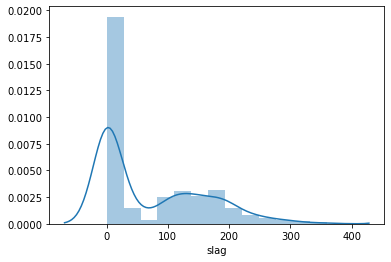

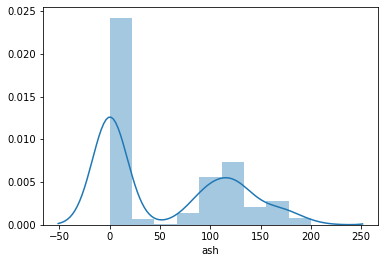

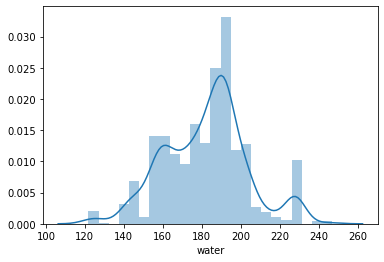

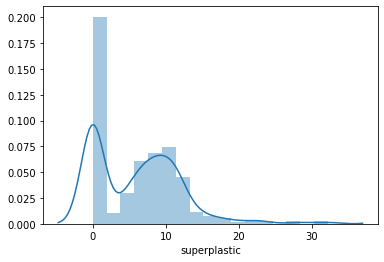

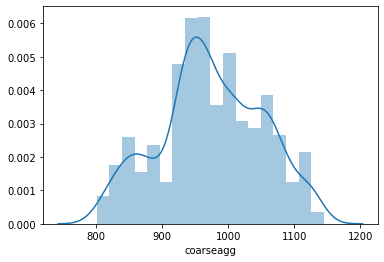

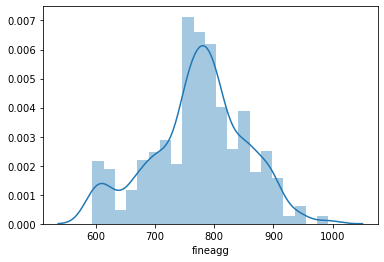

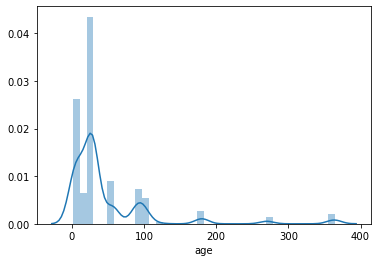

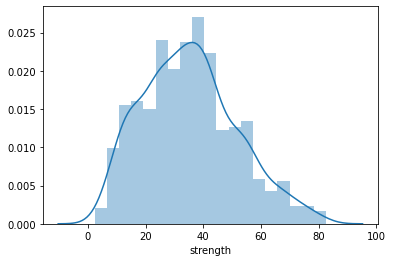

In [10]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    

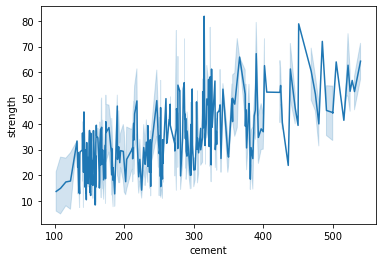

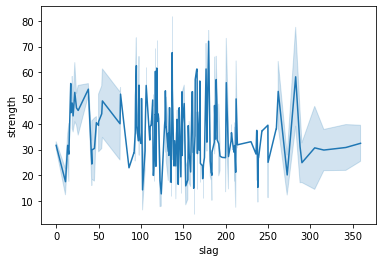

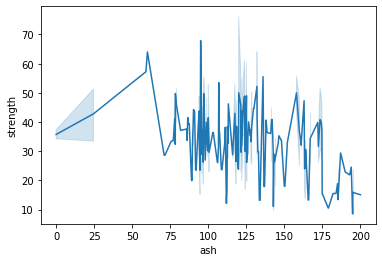

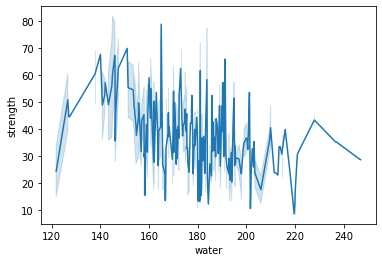

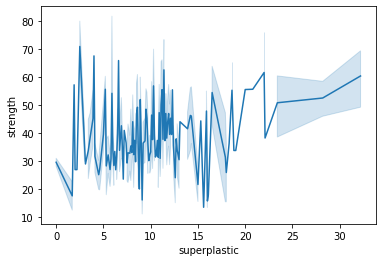

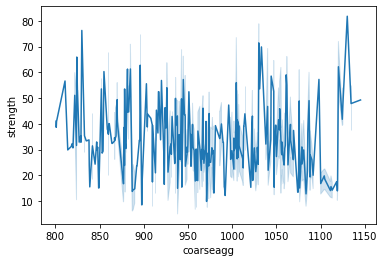

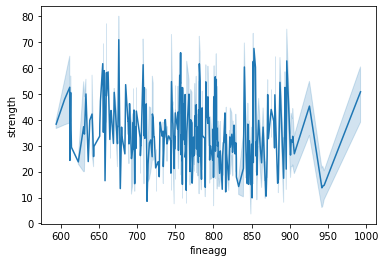

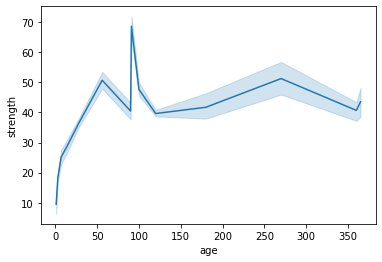

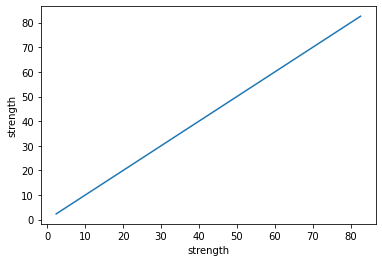

In [11]:
for i in df.columns:
    sns.lineplot(x=i,y='strength',data=df)
    plt.show()

In [12]:
#df.corr()

In [13]:
#sns.heatmap(df.corr(),annot=True,cmap='rainbow')

Insights
* Strong Positive correlation between Cement and Strength. This is true because the strength of the concrete increases with the increase in amount of cement added.
* Superplastic and Age are 2 other factors influencing the concrete strength
* Strong neagative correlation between Superplastic and Water
* Negative correlation between fineAgg and Water
* Positive Correlation between SuperPlastic and Ash

In [14]:
##sns.pairplot(df)

In [15]:
## Feature Engineering
# water cement ratio 
df['w/c_ratio']=df['water']/df['cement']
df.drop(['water','cement'],axis=1,inplace=True)
df['age']=df.age.astype(str)
df=pd.get_dummies(df,columns=['age'],drop_first=True)

df['slag']=df['slag'].apply(np.sqrt)
df['superplastic']=df['superplastic'].apply(np.sqrt)
##df['age']=df['age'].apply(np.sqrt)

In [16]:
df.head()

,slag,ash,superplastic,coarseagg,fineagg,strength,w/c_ratio,age_100,age_120,age_14,age_180,age_270,age_28,age_3,age_360,age_365,age_56,age_7,age_90,age_91
0,14.560220,0.0,0.000000,971.8,748.5,29.89,1.440198,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6.496153,124.3,3.286335,1080.8,796.2,23.51,0.937241,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.000000,95.7,2.345208,956.9,861.2,29.22,0.749600,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10.677078,0.0,0.000000,932.0,670.0,45.85,0.857143,0,0,0,0,0,1,0,0,0,0,0,0,0
4,13.542526,0.0,3.016621,1047.4,696.7,18.29,1.248708,0,0,0,0,0,1,0,0,0,0,0,0,0


Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop('strength',axis=1)
y=df.pop('strength')

In [18]:
ss=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)
print("Train Score of simple Linear Model is {}".format(lr_model.score(X_train_scaled,y_train)))
print("Test Score of simple Linear Model is {}".format(lr_model.score(X_test_scaled,y_test)))

Train Score of simple Linear Model is 0.7887166689821337
Test Score of simple Linear Model is 0.7532427789252348


In [19]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=lr_model.predict(X_test_scaled)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.7532427789252348
RMSE is 7.572352294886707


In [20]:
## Ridge Linear Model
ri=Ridge()
rid_model=ri.fit(X_train_scaled,y_train)
y_pred=rid_model.predict(X_test_scaled)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.7524221319100927
RMSE is 7.584933629182043


In [21]:
## Lasso Model
la=Lasso()
la_model=la.fit(X_train_scaled,y_train)
y_pred=la_model.predict(X_test_scaled)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.6857773176313577
RMSE is 8.545050649994625


In [22]:
## Tree Algorithms
## Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr_model=dtr.fit(X_train,y_train)
y_pred=dtr_model.predict(X_test)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.8004702469007898
RMSE is 6.8092567193149955


In [23]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr_model=rfr.fit(X_train,y_train)
y_pred=rfr_model.predict(X_test)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.8744022569313612
RMSE is 5.402400702377641


In [24]:
print("Train Score is {}".format(rfr_model.score(X_train,y_train)))
print("Test Score is {}".format(rfr_model.score(X_test,y_test)))

Train Score is 0.9823726983918126
Test Score is 0.8744022569313612


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr_model=gbr.fit(X_train,y_train)
y_pred=gbr_model.predict(X_test)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.8494743170847003
RMSE is 5.914270427607475


In [27]:
print("Train Score is {}".format(gbr_model.score(X_train,y_train)))
print("Test Score is {}".format(gbr_model.score(X_test,y_test)))

Train Score is 0.9222315666500459
Test Score is 0.8494743170847003


In [31]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(base_estimator=dtr,n_estimators=50,random_state=7)
br_model=br.fit(X_train,y_train)
y_pred=br_model.predict(X_test)
print("r2_score is {}".format(r2_score(y_test,y_pred)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

r2_score is 0.8737407974190573
RMSE is 5.416607871564341


In [32]:
print("Train Score is {}".format(br_model.score(X_train,y_train)))
print("Test Score is {}".format(br_model.score(X_test,y_test)))

Train Score is 0.9822910553283963
Test Score is 0.8737407974190573


In [49]:
## KFold cross validation on Random Forest Algorithm
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10,shuffle=True)
results=cross_val_score(rfr_model,X_train.values,y_train.values,cv=kfold,scoring='neg_mean_squared_error')
print(results)
print ("RMSE after KFold CV is {}".format(np.sqrt(-results.mean())))

[-30.403646   -26.73836468 -34.19171961 -49.82210704 -21.60258434
 -22.0770328  -21.10111538 -46.26503178 -17.09166311 -28.65517664]
RMSE after KFold CV is 5.458465364698503


In [40]:
## Hyper parameter tuning for Random Forest Algorithm


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])